1. 12_Data.csv 파일을 불러와 df1으로 선언 한 뒤, 아래의 미션을 수행하세요. (해당 데이터는 체강 세포 이미지 데이터로, 구강 내 암세포(M)와 정상세포(B)의 기하적 특성을 수치화 한 자료입니다.)
2. "Max" 이름이 붙은 Column의 기술통계량을 확인하시오.
3. Mean Radius(세포 평균 반지름)값에서 평균으로부터 표준편차 3배 이상 떨어진 데이터의 개수를 확인하시오.
4. Diagnosis(진단 - 암/정상세포 여부)에 따라 Mean Radius(세포 평균 반지름)의 대표값의 차이가 있는지 가설검정을 수행하시오.
5. Mean Radius(세포 평균 반지름)과 Mean Smoothness(세포 평균 곡률/매끄러움 정도)의 상관성이 있는지 가설검정을 수행하고, 상관 계수를 확인하시오. Correlation Coefficent
6. ‘Mean'이름이 포함된 모든 Column에 대해 정규성 검정을 실시하고, 정규분포를 따르는 Column들을 모두 Histogram으로 시각화 하시오.
7. 세포의 기하구조를 입력했을 때, 암/정상 세포를 판단하는 분류모델을 만들고자 한다. 'Mean'이름이 포함된 모든 Column을 X로, Diagnosis를 Y로 선언하여, X를 입력했을 때, Y를 분류하는 분류모델을 생성하시오. (알고리즘은 K 최근접 이웃 모델을 이용하고, 학습 / 검증 데이터 비율은 75% : 25%, 생성된 모델을 model_cell.sav로 저장하세요.)
8. 앞서 생성한 모델의 아래의 지표를 이용해 성능 평가를 수행하시오. (Acc / Recall / Precision / F1 등)
9. 생성한 분류모델의 Precision과 Recall Curve를 시각화하고, 최적의 Threshold를 계산하시오.
10. 앞서 계산한 최적의 Threshold를 이용해 Test Set을 다시 분류하고, 계산된 값을 이용하여 ROC를 시각화, AUC 값을 계산하시오.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. 12_Data.csv 파일을 불러와 df1으로 선언 한 뒤, 아래의 미션을 수행하세요. 
# (해당 데이터는 체강 세포 이미지 데이터로, 구강 내 암세포(M)와 정상세포(B)의 기하적 특성을 수치화 한 자료입니다.)
df1 = pd.read_csv('실습 파일/12_Data.csv')
df1

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
0,842302,M,17.99,122.80,1001.0,10.38,0.12,0.27760,0.30010,0.1471,...,1.0950,8.589,153.40,0.9053,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062
1,842517,M,20.57,132.90,1326.0,17.77,0.08,0.07864,0.08690,0.0702,...,0.5435,3.398,74.08,0.7339,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035
2,84300903,M,19.69,130.00,1203.0,21.25,0.11,0.15990,0.19740,0.1279,...,0.7456,4.585,94.03,0.7869,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046
3,84348301,M,11.42,77.58,386.1,20.38,0.14,0.28390,0.24140,0.1052,...,0.4956,3.445,27.23,1.1560,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092
4,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.19800,0.1043,...,0.7572,5.438,94.44,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,142.00,1479.0,22.39,0.11,0.11590,0.24390,0.1389,...,1.1760,7.673,158.70,1.2560,0.0103,0.0289,0.0520,0.0245,0.0111,0.0042
565,926682,M,20.13,131.20,1261.0,28.25,0.10,0.10340,0.14400,0.0979,...,0.7655,5.203,99.04,2.4630,0.0058,0.0242,0.0395,0.0168,0.0190,0.0025
566,926954,M,16.60,108.30,858.1,28.08,0.08,0.10230,0.09251,0.0530,...,0.4564,3.425,48.55,1.0750,0.0059,0.0373,0.0473,0.0156,0.0132,0.0039
567,927241,M,20.60,140.10,1265.0,29.33,0.12,0.27700,0.35140,0.1520,...,0.7260,5.772,86.22,1.5950,0.0065,0.0616,0.0712,0.0166,0.0232,0.0062


In [5]:
# 2. "Max" 이름이 붙은 Column의 기술통계량을 확인하시오.
df1[['Max Radius', 'Max Perimeter', 'Max Area', 'Max Texture',
       'Max Smoothness', 'Max Compactness', 'Max Concavity',
       'Max Concave Points', 'Max Symmetry', 'Max Fractal Dim']].describe()

,Max Radius,Max Perimeter,Max Area,Max Texture,Max Smoothness,Max Compactness,Max Concavity,Max Concave Points,Max Symmetry,Max Fractal Dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269209,107.261213,880.583128,25.677223,0.132197,0.254253,0.272250,0.114745,0.290316,0.083989
std,4.833217,33.602542,569.356993,6.146258,0.023292,0.157357,0.208666,0.065767,0.062011,0.018185
min,7.930000,50.410000,185.200000,12.020000,0.070000,0.030000,0.000000,0.000000,0.160000,0.060000
25%,13.010000,84.110000,515.300000,21.080000,0.120000,0.150000,0.110000,0.060000,0.250000,0.070000
50%,14.970000,97.660000,686.500000,25.410000,0.130000,0.210000,0.230000,0.100000,0.280000,0.080000
75%,18.790000,125.400000,1084.000000,29.720000,0.150000,0.340000,0.380000,0.160000,0.320000,0.090000
max,36.040000,251.200000,4254.000000,49.540000,0.220000,1.060000,1.250000,0.290000,0.660000,0.210000


In [109]:
idx = [i for i in df1.columns if "Max" in i]
df1[idx].describe()

,Max Radius,Max Perimeter,Max Area,Max Texture,Max Smoothness,Max Compactness,Max Concavity,Max Concave Points,Max Symmetry,Max Fractal Dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269209,107.261213,880.583128,25.677223,0.132197,0.254253,0.272250,0.114745,0.290316,0.083989
std,4.833217,33.602542,569.356993,6.146258,0.023292,0.157357,0.208666,0.065767,0.062011,0.018185
min,7.930000,50.410000,185.200000,12.020000,0.070000,0.030000,0.000000,0.000000,0.160000,0.060000
25%,13.010000,84.110000,515.300000,21.080000,0.120000,0.150000,0.110000,0.060000,0.250000,0.070000
50%,14.970000,97.660000,686.500000,25.410000,0.130000,0.210000,0.230000,0.100000,0.280000,0.080000
75%,18.790000,125.400000,1084.000000,29.720000,0.150000,0.340000,0.380000,0.160000,0.320000,0.090000
max,36.040000,251.200000,4254.000000,49.540000,0.220000,1.060000,1.250000,0.290000,0.660000,0.210000


In [9]:
# 3. Mean Radius(세포 평균 반지름)값에서 평균으로부터 표준편차 3배 이상 떨어진 데이터의 개수를 확인하시오.
u_limit = df1['Mean Radius'].mean()+3*df1['Mean Radius'].std()
l_limit = df1['Mean Radius'].mean()-3*df1['Mean Radius'].std()

df1[(df1['Mean Radius']>=u_limit)|(df1['Mean Radius']<=l_limit)]

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
82,8611555,M,25.22,171.5,1878.0,24.91,0.11,0.2665,0.3339,0.1845,...,0.8973,7.382,120.0,1.4740,0.0082,0.0569,0.0573,0.0203,0.0107,0.0059
180,873592,M,27.22,182.1,2250.0,21.87,0.11,0.1914,0.2871,0.1878,...,0.8361,5.820,128.7,1.4810,0.0046,0.0254,0.0311,0.0124,0.0158,0.0027
212,8810703,M,28.11,188.5,2499.0,18.47,0.11,0.1516,0.3201,0.1595,...,2.8730,21.980,525.6,1.4760,0.0135,0.0277,0.0639,0.0141,0.0478,0.0045
352,899987,M,25.73,174.2,2010.0,17.46,0.11,0.2363,0.3368,0.1913,...,0.9948,7.222,153.1,0.8509,0.0064,0.0424,0.0427,0.0151,0.0234,0.0034
461,911296202,M,27.42,186.9,2501.0,26.27,0.11,0.1988,0.3635,0.1689,...,2.5470,18.650,542.2,1.3060,0.0077,0.0537,0.0806,0.0260,0.0170,0.0046


In [3]:
u_limit = df1['Mean Radius'] >= df1['Mean Radius'].mean()+3*df1['Mean Radius'].std()
l_limit = df1['Mean Radius'] <= df1['Mean Radius'].mean()-3*df1['Mean Radius'].std()

df1[u_limit|l_limit]

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
82,8611555,M,25.22,171.5,1878.0,24.91,0.11,0.2665,0.3339,0.1845,...,0.8973,7.382,120.0,1.4740,0.0082,0.0569,0.0573,0.0203,0.0107,0.0059
180,873592,M,27.22,182.1,2250.0,21.87,0.11,0.1914,0.2871,0.1878,...,0.8361,5.820,128.7,1.4810,0.0046,0.0254,0.0311,0.0124,0.0158,0.0027
212,8810703,M,28.11,188.5,2499.0,18.47,0.11,0.1516,0.3201,0.1595,...,2.8730,21.980,525.6,1.4760,0.0135,0.0277,0.0639,0.0141,0.0478,0.0045
352,899987,M,25.73,174.2,2010.0,17.46,0.11,0.2363,0.3368,0.1913,...,0.9948,7.222,153.1,0.8509,0.0064,0.0424,0.0427,0.0151,0.0234,0.0034
461,911296202,M,27.42,186.9,2501.0,26.27,0.11,0.1988,0.3635,0.1689,...,2.5470,18.650,542.2,1.3060,0.0077,0.0537,0.0806,0.0260,0.0170,0.0046


In [10]:
len(df1[(df1['Mean Radius']>=u_limit)|(df1['Mean Radius']<=l_limit)])

5

In [15]:
# 4. Diagnosis(진단 - 암/정상세포 여부)에 따라 Mean Radius(세포 평균 반지름)의 대표값의 차이가 있는지 가설검정을 수행하시오.
sample1 = df1[df1['Diagnosis']=="M"]['Mean Radius']
sample2 = df1[df1['Diagnosis']=="B"]['Mean Radius']

# 귀무가설 : 정규분포를 따른다 / 대립가설 : 정규분포를 따르지 않는다
# sample1 : 귀무가설 기각, 정규분포를 따르지 않는다
# sample2 : 귀무가설 채택, 정규분포를 따른다고 볼 수 있다.
# 하지만 두 집단을 검증할 때는 둘 다 따라야 함으로 ranksums로 진행
stats.normaltest(sample1), stats.normaltest(sample2)

(NormaltestResult(statistic=9.774681423412504, pvalue=0.0075414507243749054),
 NormaltestResult(statistic=0.431413656391856, pvalue=0.805971555375275))

In [14]:
# 귀무가설 : 두 집단의 대푯값은 동일하다 / 대립가설 : 두 집단의 대푯값은 동일하지 않다
# p값은 0에 가까움으로 귀무가설 기각, 두 집단의 대푯값은 동일하다고 볼 수 없다. (차이가 있따고 볼 수 있따)
stats.ranksums(sample1, sample2)

RanksumsResult(statistic=17.46423979127818, pvalue=2.682506544617575e-68)

In [16]:
# 5. Mean Radius(세포 평균 반지름)과 Mean Smoothness(세포 평균 곡률/매끄러움 정도)의 상관성이 있는지 가설검정을 수행하고, 
# 상관 계수를 확인하시오. Correlation Coefficent

A = df1['Mean Radius']
B = df1['Mean Smoothness']

# 귀무가설 : 정규분포를 따른다 / 대립가설 : 정규분포를 따르지 않는다
# 두 집단은 모두 정규성을 따르지 않는다고 볼 수 있음으로, 스피어만 상관분석 진행
stats.normaltest(A),stats.normaltest(B)

(NormaltestResult(statistic=73.19882231579592, pvalue=1.2737309250385324e-16),
 NormaltestResult(statistic=16.224407582610276, pvalue=0.00029985732154021345))

In [17]:
# 귀무가설 : 두 그룹은 서로 상관이 없다/ 대립가설 : 두 그룹은 서로 상관이 있다.
# p값은 0.05보다 작음으로 귀무가설 기각, 두 그룹은 서로 상관이 있다 (상관관계가 있다고 볼 수 있다.)
stats.spearmanr(A,B)

SignificanceResult(statistic=0.125935259003714, pvalue=0.002617573533346598)

In [4]:
df1[['Mean Radius', 'Mean Smoothness']].corr(method='spearman')

,Mean Radius,Mean Smoothness
Mean Radius,1.000000,0.125935
Mean Smoothness,0.125935,1.000000


In [7]:
# 6.‘Mean'이름이 포함된 모든 Column에 대해 정규성 검정을 실시하고, 정규분포를 따르는 Column들을 모두 Histogram으로 시각화 하시오.
idx = [i for i in df1.columns if "Mean" in i]

box = []
for i in idx:
    value, p = stats.normaltest(df1[i])
    print(p)
    if p < 0.05:
        box.append(i)
box

1.2737309250385324e-16
3.595463394731772e-18
2.3860403182400484e-42
4.685882796961145e-10
0.00029985732154021345
2.7333433490329536e-25
1.8703782368840408e-31
1.1127913160064918e-22
1.5898397363101805e-13
1.4280298636963606e-32


['Mean Radius',
 'Mean Perimeter',
 'Mean Area',
 'Mean Texture',
 'Mean Smoothness',
 'Mean Compactness',
 'Mean Concavity',
 'Mean Concave Points',
 'Mean Symmetry',
 'Mean Fractal Dim']

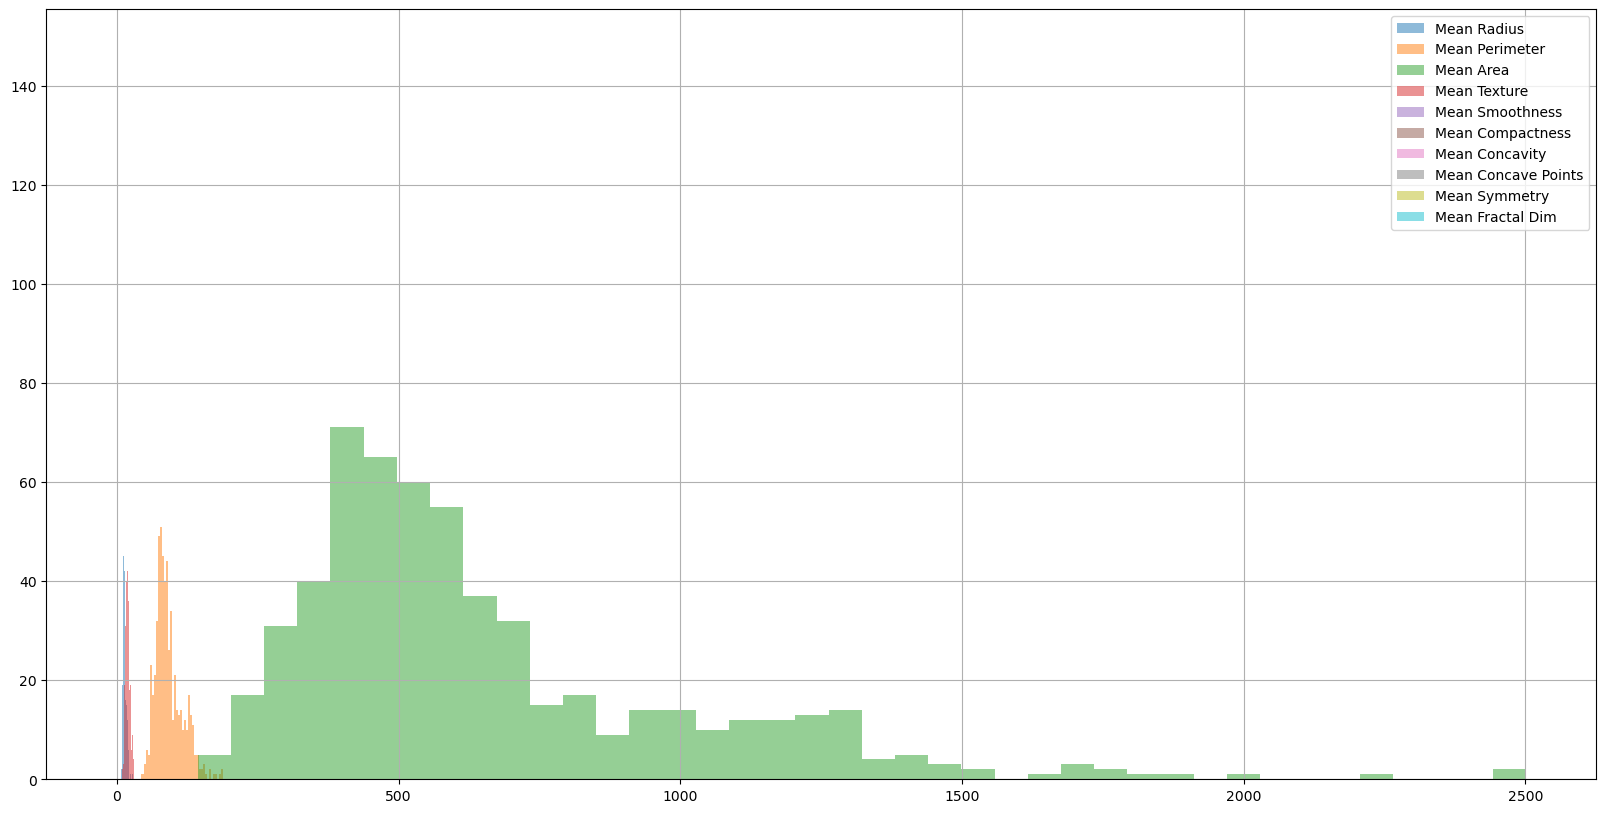

In [12]:
fig = plt.figure(figsize = (20,10))

for i in idx:
    value, p = stats.normaltest(df1[i])
    if p < 0.05:
        plt.hist(df1[i], bins=40, alpha = 0.5)
        
plt.grid()
plt.legend(idx)
plt.show()

In [133]:
# 7. 세포의 기하구조를 입력했을 때, 암/정상 세포를 판단하는 분류모델을 만들고자 한다. 
#'Mean'이름이 포함된 모든 Column을 X로, Diagnosis를 Y로 선언하여, 
# X를 입력했을 때, Y를 분류하는 분류모델을 생성하시오. 
# (알고리즘은 의사결정트리 모델을 이용하고, 학습 / 검증 데이터 비율은 75% : 25%, 생성된 모델을 model_cell.sav로 저장하세요.)
from sklearn.tree import DecisionTreeClassifier

df1['Target'] = df1['Diagnosis'].replace({"M": 0 ,"B":1})

X = df1[['Mean Radius', 'Mean Perimeter', 'Mean Area',
       'Mean Texture', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dim']].to_numpy()
y = df1['Target'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.25)

mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

train_scaled=(train_x-mean)/std
test_scaled=(test_x-mean)/std

dtc = DecisionTreeClassifier()
dtc.fit(train_scaled, train_y)

import joblib
joblib.dump(dtc, '생성 파일/model_cell.sav')

['생성 파일/model_cell.sav']

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

In [16]:
X = df1[idx].to_numpy()
y = df1['Diagnosis'].replace({"M":1,"B":0}).to_numpy()

# 75:25가 기본값으로 설정되어 있슈
train_x, test_x, train_y, test_y = train_test_split(X,y) 

# 과대적합 문제가 발생할 수도 있으니깐, 
# max_depth를 설정해서 깊이를 조절해줘야함.
# kNN처럼, max_depth를 조절하면서 가장 최적의 값을 알아봐야 함
model = DecisionTreeClassifier(max_depth=5) 
model.fit(train_x, train_y)

# 현재 파일이 없어도, open과 wb를 통해서 파일을 생성할 수 있음
# 그리고 wb는 바이너리로 작성임
# dump로 모델을 집어넣고, 파일 경로에 넣고
# close를 통해서 삭제 해주는 거임

f = open("생성 파일/model_cell_pickle.sav",'wb')
pickle.dump(model,f)
f.close()

In [134]:
# 8. 앞서 생성한 모델의 아래의 지표를 이용해 성능 평가를 수행하시오. (Acc / Recall / Precision / F1 등)
pred = dtc.predict(test_scaled)

print('정밀도', precision_score(pred, test_y))
print('재현율', recall_score(pred, test_y))
print('정확도', accuracy_score(pred, test_y))
print('F1-스코어', f1_score(pred, test_y))


정밀도 0.8202247191011236
재현율 0.9358974358974359
정확도 0.8531468531468531
F1-스코어 0.874251497005988


In [17]:
pred = model.predict(test_x)

from sklearn.metrics import classification_report
report = classification_report(pred, test_y)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        95
           1       0.88      0.88      0.88        48

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [19]:
proba = model.predict_proba(test_x)[:,1]
proba

array([0.9929078 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.9929078 , 0.        ,
       0.9929078 , 0.        , 0.9929078 , 0.9929078 , 0.        ,
       0.9929078 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.9929078 , 0.9929078 , 0.        ,
       0.        , 0.        , 0.9929078 , 0.        , 0.        ,
       0.9929078 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.9929078 , 0.9929078 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11111111, 0.9929078 , 0.        , 0.        , 0.        ,
       0.        , 0.9929078 , 0.9929078 , 0.9929078 , 0.        ,
       0.        , 0.9929078 , 1.        , 0.9929078 , 0.99290

In [135]:
# 9. 생성한 분류모델의 Precision과 Recall Curve를 시각화하고, 최적의 Threshold를 계산하시오.

# 임계값을 설정하는 방법
from sklearn.metrics import precision_recall_curve

pred = dtc.predict_proba(test_scaled)[:,1]

# 정밀도, 재현율, 임계값
precisions, recalls, thresholds = precision_recall_curve(test_y, pred)

sample = pd.DataFrame()
sample['precisions'] = precisions[:-1]
sample['recalls'] = recalls[:-1]
sample['thresholds'] = thresholds
sample

,precisions,recalls,thresholds
0,0.622378,1.000000,0.0
1,0.935897,0.820225,1.0


<Axes: xlabel='thresholds', ylabel='value'>

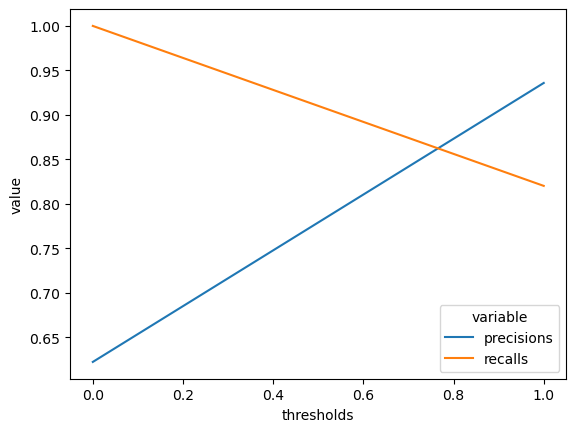

In [136]:
sample2 = pd.melt(sample, id_vars='thresholds')
sns.lineplot(data=sample2, x='thresholds', y='value', hue='variable')

In [142]:
sample2

,thresholds,variable,value
0,0.0,precisions,0.622378
1,1.0,precisions,0.935897
2,0.0,recalls,1.000000
3,1.0,recalls,0.820225


In [ ]:
# 10. 앞서 계산한 최적의 Threshold를 이용해 Test Set을 다시 분류하고, 계산된 값을 이용하여 ROC를 시각화, AUC 값을 계산하시오.

In [138]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_y, pred)

In [139]:
sample = pd.DataFrame()
sample['FPR'] = fpr
sample['TPR'] = tpr
sample['thresholds'] = thresholds

,FPR,TPR,thresholds
0,0.000000,0.000000,inf
1,0.092593,0.820225,1.0
2,1.000000,1.000000,0.0


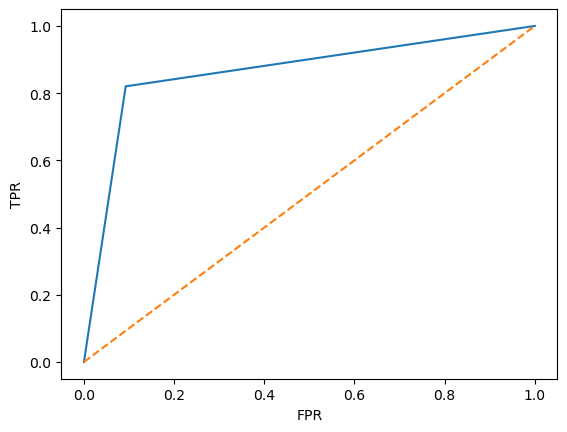

In [140]:
# FPR : 거짓인데 긍정으로 예측한 것
# TPR : 긍정인데 긍정이라고 예측한 것

plt.plot(sample['FPR'], sample['TPR'])
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.show()

In [141]:
# 적분된 값
roc_auc_score(test_y, pred)

0.8638160632542655

In [143]:
from sklearn.ensemble import RandomForestClassifier

# oob_score는 사용하지 않은 트리들로 평가하겠다는 것
rf = RandomForestClassifier(oob_score=True)
rf.fit(X,y)

RandomForestClassifier(oob_score=True)

In [ ]:
# 구분하지 않는다면 fit한 다음에 pred를 어떻게 하는 건가융?
# 정확도를 확인하는 방법은?

In [144]:
rf.oob_score_

0.9402460456942003

### 의사결정나무 모델은 제대로 안나오니깐, 로지스틱으로 다시 만들어보기


In [24]:

X = df1[idx].to_numpy()
y = df1['Diagnosis'].replace({"M":1,"B":0}).to_numpy()

# 75:25가 기본값으로 설정되어 있슈
train_x, test_x, train_y, test_y = train_test_split(X,y) 

# 로지스틱의 경우는 max_iter이 기본값이 100으로 설정되어있음
# 충분하게 돌지 못한 경우에는 경고표시가 나타나니 1000으로 수정
model = LogisticRegression(max_iter=1000) 
model.fit(train_x, train_y)

proba = model.predict_proba(test_x)[:,1]
proba

array([1.45466853e-02, 9.61841159e-01, 1.25366997e-02, 9.32366157e-02,
       5.72675871e-02, 9.46649161e-01, 5.96563784e-01, 1.87651229e-01,
       9.83686050e-01, 9.46219368e-01, 1.67952993e-03, 7.65663155e-01,
       6.96927395e-03, 2.48883654e-02, 9.95314855e-01, 1.43810660e-01,
       3.95191068e-02, 4.49844177e-02, 9.95832103e-01, 9.99920795e-01,
       6.51389477e-02, 2.13711143e-01, 4.87248931e-01, 2.23429905e-02,
       2.48532525e-01, 8.57310662e-01, 9.35015745e-01, 1.52547086e-02,
       5.23936695e-03, 1.70644934e-01, 1.35405521e-01, 7.13096147e-02,
       4.59446256e-01, 1.42213840e-01, 9.36595954e-01, 6.05017073e-02,
       2.93955817e-01, 7.27834373e-02, 5.65676438e-02, 8.14661888e-01,
       9.86973938e-01, 8.69072991e-01, 9.83842427e-01, 6.11504847e-03,
       5.47894460e-02, 6.63728930e-01, 9.76872481e-01, 2.10045443e-03,
       2.67362926e-04, 7.01378173e-01, 9.99786320e-01, 9.69873469e-01,
       3.73899221e-01, 7.36631599e-01, 9.98550642e-01, 4.07994911e-01,
      

In [30]:
# 적분된 값
roc_auc_score(test_y, proba)

0.9731638418079096

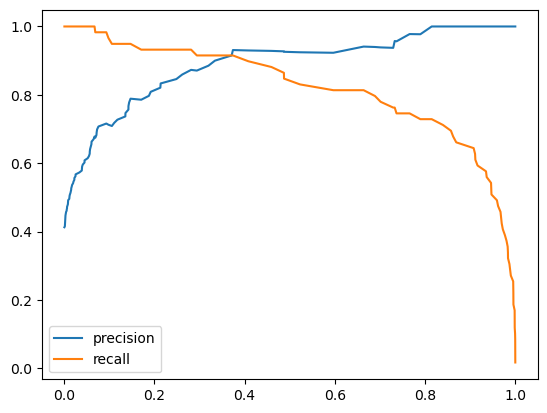

In [25]:
from sklearn.metrics import precision_recall_curve

# 하나를 빼는 이유는, 가장 높은 임계값은 모든 샘플을 부정으로 인지,
# 실제로 존재할 수 없어서
precision, recall, thresholds = precision_recall_curve(test_y, proba)

plt.plot(thresholds, precision[:-1], label="precision")
plt.plot(thresholds, recall[:-1], label="recall")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(test_y, proba)

In [27]:
fpr, tpr, th = roc_curve(test_y, proba)

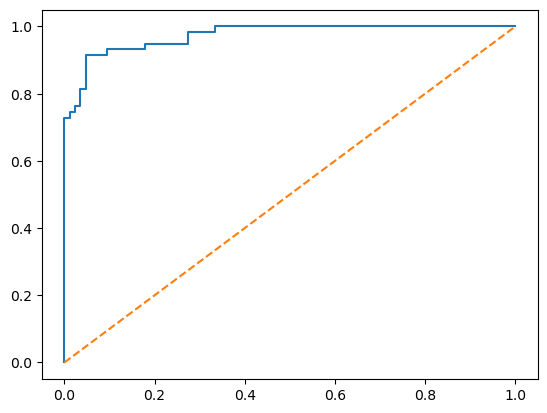

In [29]:
sample = pd.DataFrame()
sample['FPR'] = fpr
sample['TPR'] = tpr
sample['thresholds'] = thresholds

plt.plot(sample['FPR'], sample['TPR'])
plt.plot([0,1],[0,1],linestyle='--')

plt.show()